In [2]:
import pandas as pd

# Reading Dataset

In [3]:
diabetes_df = pd.read_csv("../datasets/diabetes.csv", index_col=[0])

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [4]:
X_features = list(diabetes_df.columns)
X_features.remove("Outcome")

X_features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# Split the dataset 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df[X_features], 
        diabetes_df.Outcome, test_size=0.3, random_state=100)

In [7]:
[X_train, X_test, y_train, y_test]

[             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 Pregnancies                                                         
 7                152             88             44        0  50.0   
 1                136             74             50      204  37.4   
 0                131              0              0        0  43.2   
 8                125             96              0        0   0.0   
 2                108             52             26       63  32.5   
 ...              ...            ...            ...      ...   ...   
 10               133             68              0        0  27.0   
 8                176             90             34      300  33.7   
 4                 92             80              0        0  42.2   
 2                112             66             22        0  25.0   
 2                 68             70             32       66  25.0   
 
              DiabetesPedigreeFunction  Age  
 Pregnancies                              

In [8]:
X_train.shape

(537, 7)

In [9]:
X_test.shape

(231, 7)

# Build a RandomForest Model

In [10]:
from sklearn.ensemble import RandomForestClassifier  

rf_clf = RandomForestClassifier(n_estimators=100, max_features=0.2, max_depth=10, 
                max_samples=0.5)

In [11]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)

In [12]:
y_pred_prob = rf_clf.predict_proba(X_test)[:, 1]
y_pred = rf_clf.predict(X_test)

# Understand the model using ELI5

In [13]:
import eli5.sklearn

2022-12-01 23:12:17.544936: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 23:12:17.989148: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-01 23:12:18.084089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/hu

In [14]:
eli5.explain_weights(rf_clf, feature_names=X_features)

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Glucose', weight=0.2505310169886713, std=0.09700673367439597, value=None), FeatureWeight(feature='BMI', weight=0.1714099188807395, std=0.07350895729775261, value=None), FeatureWeight(feature='Age', weight=0.151931268077011, std=0.0611767171755365, value=None), FeatureWeight(feature='DiabetesPedigreeFunction', weight=0.14017394801334865, std=0.058798637078865824, value=None), FeatureWeight(feature='BloodPressure', weight=0.10834961378774607, std=0.04118138236467062, value=None), FeatureWeight(feature='SkinThickness', weight=0.0907996266814748, std=0.040814719555015616, value=None), FeatureWeight(feature='Insulin', weight=0.08680460757100875, std=0.04839243767720228, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

# Explaining the WEights for a Non-diabetes Person

In [15]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [16]:
y_test.iloc[0]

0

In [17]:
eli5.explain_prediction( rf_clf,
                         X_test.iloc[0],
                         target_names = ['Non-diabetes', 'Diabetes'] )

X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but Dec

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Non-diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.6543656716417912, std=None, value=1.0), FeatureWeight(feature='Glucose', weight=0.13544279700897263, std=None, value=79.0), FeatureWeight(feature='Insulin', weight=0.06844533597337657, std=None, value=48.0), FeatureWeight(feature='Age', weight=0.06645891743359544, std=None, value=23.0), FeatureWeight(feature='BloodPressure', weight=0.04038893506416691, std=None, value=60.0)], neg=[FeatureWeight(feature='BMI', weight=-0.07801653724061015, std=None, value=43.5), FeatureWeight(feature='SkinThickness', weight=-0.07688354966690786, std=None, value=42.0), FeatureWeight(feature='DiabetesPedigreeFunction', weight=-0.058487284500098886, std=None, value=0.678)], pos_remaining=0, neg_remaining=0), proba=0.7517142857142857, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

# Explaining the Weights for a Non-diabetes Person

In [18]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [19]:
y_test.iloc[4]

0

In [20]:
eli5.explain_prediction(rf_clf, X_test.iloc[4], 
    target_names=['Non-diabetes', 'Diabetes'])

X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but Dec

Explanation(estimator='RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.5)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target='Non-diabetes', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.6543656716417912, std=None, value=1.0), FeatureWeight(feature='DiabetesPedigreeFunction', weight=0.05617894454399368, std=None, value=0.374), FeatureWeight(feature='Insulin', weight=0.052879224159235794, std=None, value=94.0), FeatureWeight(feature='Glucose', weight=0.03099956604856233, std=None, value=123.0), FeatureWeight(feature='BloodPressure', weight=0.01352716141429441, std=None, value=70.0)], neg=[FeatureWeight(feature='Age', weight=-0.11273152908864986, std=None, value=40.0), FeatureWeight(feature='SkinThickness', weight=-0.05985741919332975, std=None, value=44.0), FeatureWeight(feature='BMI', weight=-0.03994900962995536, std=None, value=33.1)], pos_remaining=0, neg_remaining=0), proba=0.5954126098959422, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

# Partial Dependece Plots (PDPs)

In [21]:
from sklearn.inspection import PartialDependenceDisplay

# Effect of Insulin on Diabetes

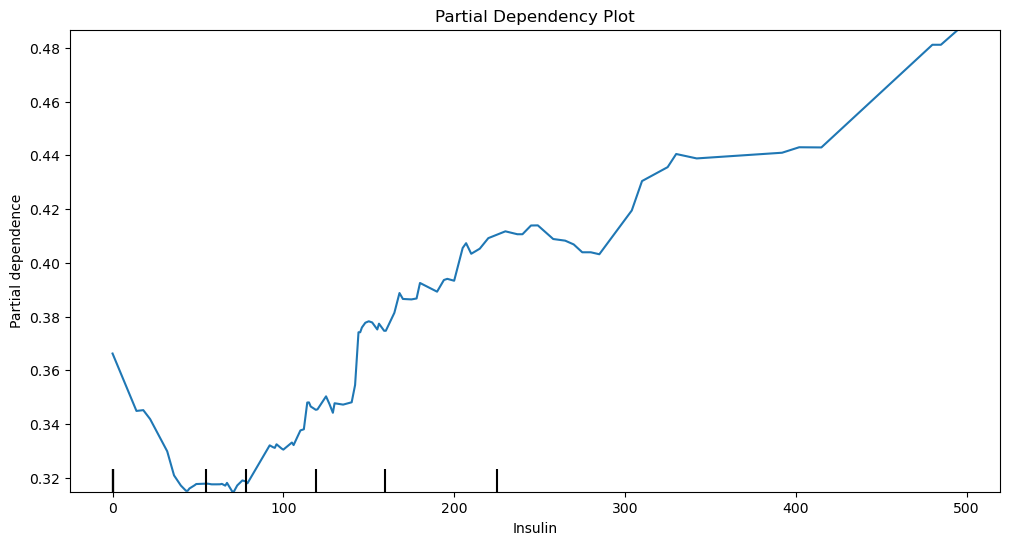

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(rf_clf, X_test, 
    features=['Insulin'], feature_names=X_features, ax=ax)

# Effect of Glucose on Diabetes

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


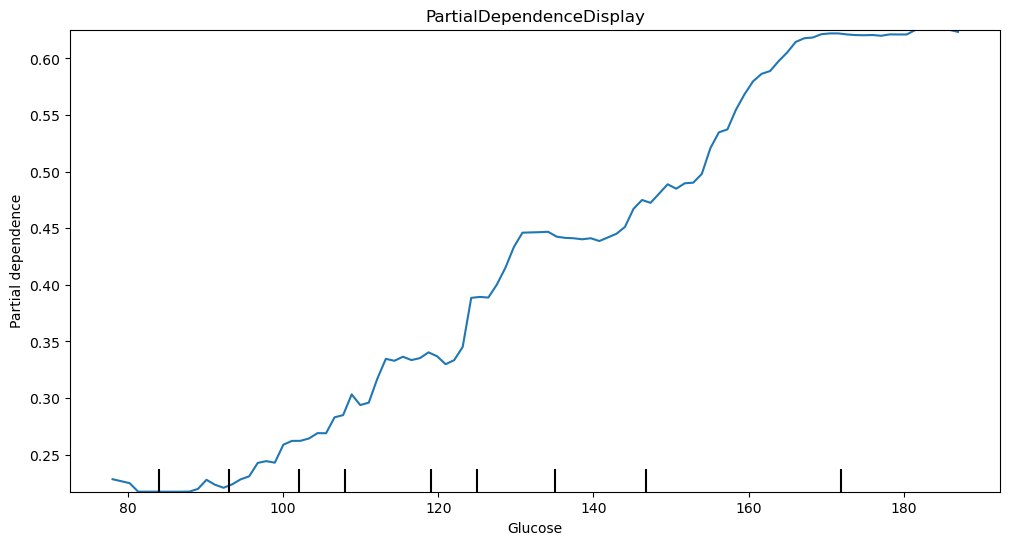

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("PartialDependenceDisplay")
PartialDependenceDisplay.from_estimator(rf_clf, X_test, 
    features=["Glucose"], feature_names=X_features, ax=ax)

# LIME (Local Interpretation of Model Explanation)

In [24]:
import lime 
import lime.lime_tabular

In [25]:
explainer = (lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.to_numpy(),
    training_labels=y_train,
    feature_names=X_train,
    class_names=["Non-diabetes", "Diabetes"],
    kernel_width=3, 
    verbose=True
))

# Explaining a case of Non-Diabetes

In [26]:
X_test.iloc[0]

Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 1, dtype: float64

In [27]:
exp = explainer.explain_instance(X_test.iloc[0].to_numpy(), rf_clf.predict_proba)

Intercept 0.3865840627517625
Prediction_local [0.31970256]
Right: 0.24828571428571425


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [28]:
exp.show_in_notebook(show_table=True, show_all=False)

# Using SHAP

In [29]:
import shap

# Explaining a case of Non-diabetes

In [31]:
row_to_show = 1 
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.87015021, 0.12984979]])

In [32]:
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(data_for_prediction_array)

In [34]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1],
    data_for_prediction,
    figsize=(20, 2)
)

# Explaining a case of diabetes

In [37]:
row_to_show = 4 
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_clf.predict_proba(data_for_prediction_array)

shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1],
    data_for_prediction
)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


# Global Explanation of SHAP

In [38]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_train)

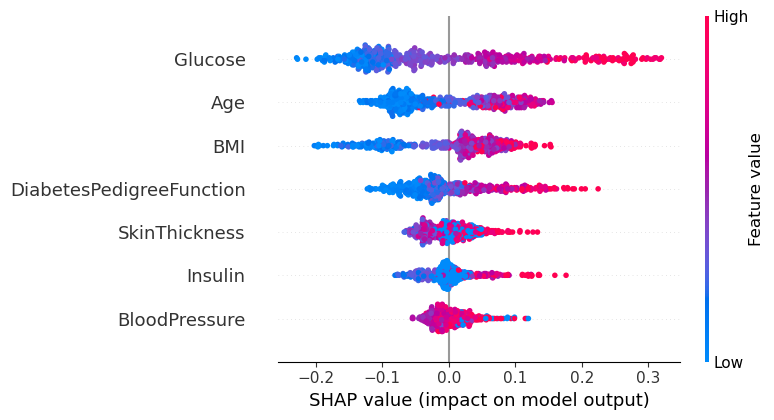

In [39]:
shap.summary_plot(
    shap_values[1],
    X_train,
    plot_type="dot"
)

In [40]:
explainer.expected_value

array([0.65436567, 0.34563433])

In [41]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1],
    X_train
)

# Individual Conditional Expectations (ICE)

/home/mike/.local/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:153: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_eval.iloc[:, variable] = new_values[i]


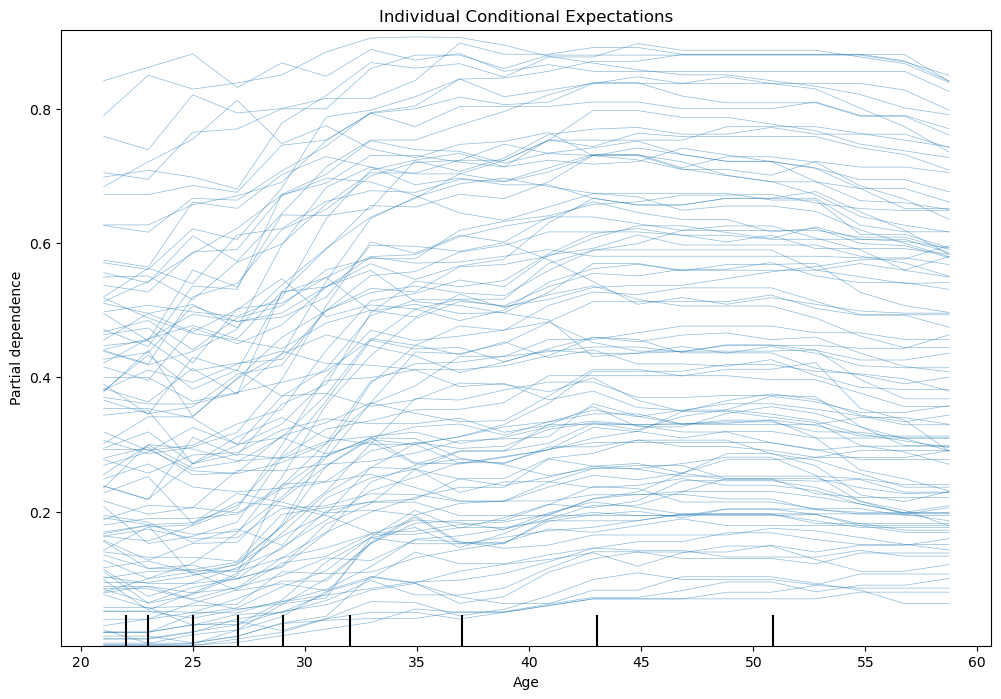

In [45]:
import matplotlib.pyplot as plt 
from sklearn.inspection import PartialDependenceDisplay 

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=["Age"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax=ax
)

/home/mike/.local/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:153: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_eval.iloc[:, variable] = new_values[i]


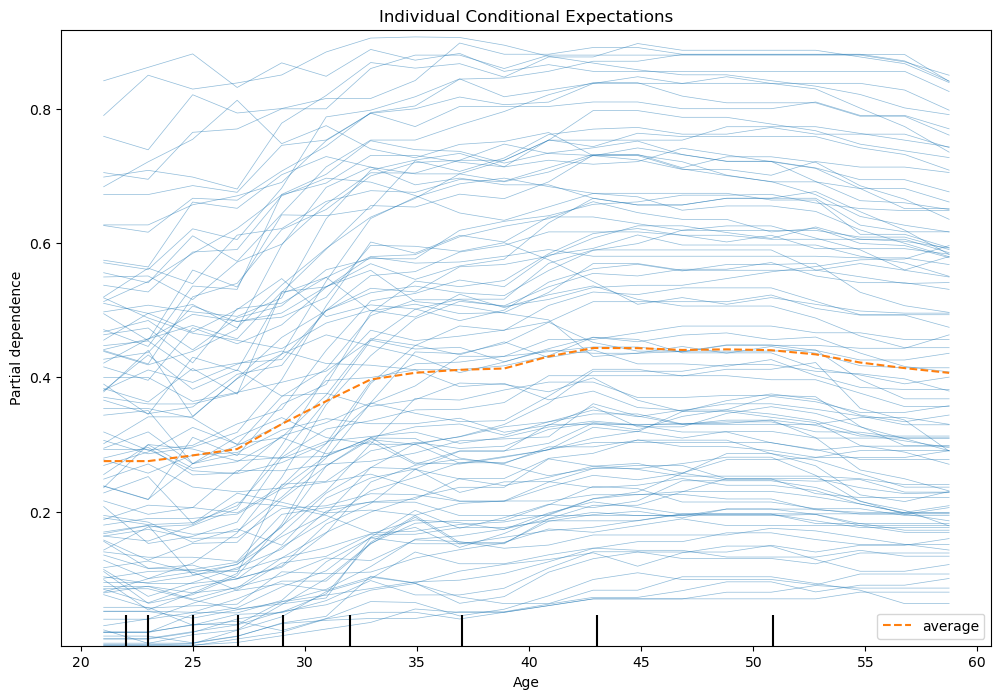

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train, 
    features=["Age"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax=ax
)